# this is the same as plot_gate_dists2.py, but made in a jupyter notebook
so I can plot easier


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import sys

sys.path.append('../../../string/analysis/scripts')
from plot_parameters_for_paper import *

plotting_params()

In [2]:
#### plotting density - use KDE

## get all pieces together, then colors and naming consistent in plots
#G5_Out = np.array(['GLUT5_out', 'Out Open', 'green', "Greens"])
#G5_OutOcc = np.array(['GLUT5_out_occ', 'Out Occ.', 'grey', "Greys"])
#G5_Occ = np.array(['GLUT5_occ', 'Occluded', 'red', "Reds"])
#G5_InOcc = np.array(['GLUT5_in_occ', 'In Occ.', 'orange', "Oranges"])
#G5_In = np.array(['GLUT5_in', 'In Open', 'blue', "Blues"])
#all_sims = np.array([G5_Out, G5_OutOcc, G5_Occ, G5_InOcc, G5_In])

G5_Out = np.array(['GLUT5_out', 'Out Open', '#00245D', "OutOpen_b"])
G5_OutOcc = np.array(['GLUT5_out_occ', 'Out Occ.', 'grey', "OutOcc_b"])
G5_Occ = np.array(['GLUT5_occ', 'Occluded', 'red', "Occ_b"])
G5_InOcc = np.array(['GLUT5_in_occ', 'In Occ.', 'orange', "InOcc_b"])
G5_In = np.array(['GLUT5_in', 'In Open', 'blue', "InOpen_b"])
all_sims = np.array([G5_Out, G5_OutOcc, G5_Occ, G5_InOcc, G5_In])

In [3]:
def make_colormap(color_start,color_end,ncolors,name):
    color_array = np.zeros((ncolors,4))
    color_array[:,] = color_start
    #color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
    color_array[:,0] = np.linspace(color_start[0], color_end[0], ncolors)
    color_array[:,1] = np.linspace(color_start[1], color_end[1], ncolors)
    color_array[:,2] = np.linspace(color_start[2], color_end[2], ncolors)

    map_object = LinearSegmentedColormap.from_list(name=name,colors=color_array)
    plt.register_cmap(cmap=map_object)
    return color_array

In [4]:
color_start = [0.91,0.93,1.0,0]
color_start = [1.00,1.00,1.00,0.00]
ncolors = 256
t = make_colormap(color_start=[0.90,0.88,0.99,1.00], color_end = [0.08,0.00,0.99,1.00], ncolors=ncolors, name='OutOpen_b')
t = make_colormap(color_start=[0.88,0.91,0.98,1.00], color_end = [0.00,0.35,0.90,1.00], ncolors=ncolors, name='OutOcc_b')
t = make_colormap(color_start=[0.97,0.98,1.00,1.00], color_end = [0.00,0.59,0.96,1.00], ncolors=ncolors, name='Occ_b')
t = make_colormap(color_start=color_start, color_end = [0.00,0.64,0.59,1.0], ncolors=ncolors, name='InOcc_b')
t = make_colormap(color_start=color_start, color_end = [0.00,0.45,0.35,1.0], ncolors=ncolors, name='InOpen_b')

In [5]:
def plot_gate_dist(name, col, color_map):
    ec = np.loadtxt('../gate_dists/extracellular/%s.EC.xvg' %name)[:,1]
    ic = np.loadtxt('../gate_dists/intracellular/%s.IC.xvg' %name)[:,1]
    
    sns.kdeplot(ic,y=ec, shade=True, thresh=0.05, alpha=0.6,legend=True, cbar=False, ax=ax, cmap=color_map)
   # b= ax.scatter(ic,ec, color=col, label=name, alpha = 1)   #needs to be after so that the spots come on top

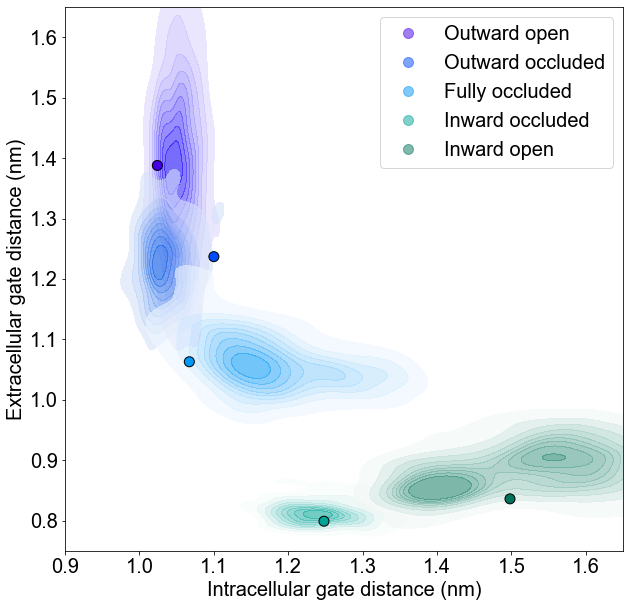

In [6]:
start_EC = []
start_IC = []
fig, ax = plt.subplots(figsize = (10,10))

for sim in all_sims:
    plot_gate_dist(sim[0], sim[2], sim[3])
    start_EC.append(np.loadtxt('../gate_dists/extracellular/%s.EC.starting_str.xvg' % sim[0])[1])
    start_IC.append(np.loadtxt('../gate_dists/intracellular/%s.IC.starting_str.xvg' % sim[0])[1])
    
plt.ylabel('Extracellular gate distance (nm)')
plt.xlabel('Intracellular gate distance (nm)')

colors = ["#4500E6", "#004BFA", "#0097f5", "#00a496", "#00735a"]
texts = ["Outward open", "Outward occluded", "Fully occluded", "Inward occluded", "Inward open"]
plt.scatter(start_IC, start_EC, color = colors, s = 100, edgecolor = 'black')

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], alpha = 0.5, 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]   #seaborn legends are weird... 
plt.legend(handles=patches)

xlim = (0.9,1.65)
ylim = (0.75,1.65)

plt.xlim(xlim)
plt.ylim(ylim)


plt.savefig('../images_figures/gate_distances_KDE.newcolors.svg', dpi =1000)
#plt.show()

[0.96862745 0.98431373 1.         1.        ] [0.03137255 0.18823529 0.41960784 1.        ]


In [ ]:


### plotting as a function of time - use contour
fig, axs = plt.subplots(5)
for n, sim in enumerate(all_sims):
    name = sim[0]
    ec = np.loadtxt('../gate_dists/extracellular/%s.EC.xvg' %name)[:,1]
    ic = np.loadtxt('../gate_dists/intracellular/%s.IC.xvg' %name)[:,1]
    times = np.loadtxt('../gate_dists/intracellular/%s.IC.xvg' %name)[:,0] / 1000
    t = axs[n].scatter(ic, ec, c=times, cmap = sim[3], alpha = 0.5)
    axs[n].set_xlim(plotxlim)
    axs[n].set_ylim(plotylim)
    
    axs[n].set_title(sim[0])
    fig.colorbar(t, ax = axs[n])
    
axs[2].set_ylabel('Extracellular gate (nm)')
#plt.ylabel('Extracellular gate (nm)')
plt.xlabel("intracellular gate (nm)")
fig.set_figheight(15)
plt.tight_layout()
#plt.savefig('gate_distance_time.png', dpi = 1000)


In [79]:
pwd

'/data2/GLUT5_string/GLUT5_atomistic/analysis/scripts'